# W43 Adam's map

In [1]:
import aplpy
from astropy.io import fits
import astropy.units as u
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rc('font', **{'family': 'serif', 'size': 28})
plt.rc('lines', linewidth = 2.5)
plt.rc('text', usetex=True)

In [3]:
from pywavan import powspec, fan_trans, fbm2d, apodize, padding, gauss_beam

In [5]:
figfile = '/Users/robitaij/postdoc/adam_bolocam/v2.1_ds2_l030_13pca_map20_crop_reproject.fits'

In [6]:
#Read map
HDU = fits.open(figfile)
im = HDU[0].data
header = HDU[0].header

#Replace Nan
im[im != im] = 0.

#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60.

INFO: Auto-setting vmin to -2.354e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.790e-01 [aplpy.core]


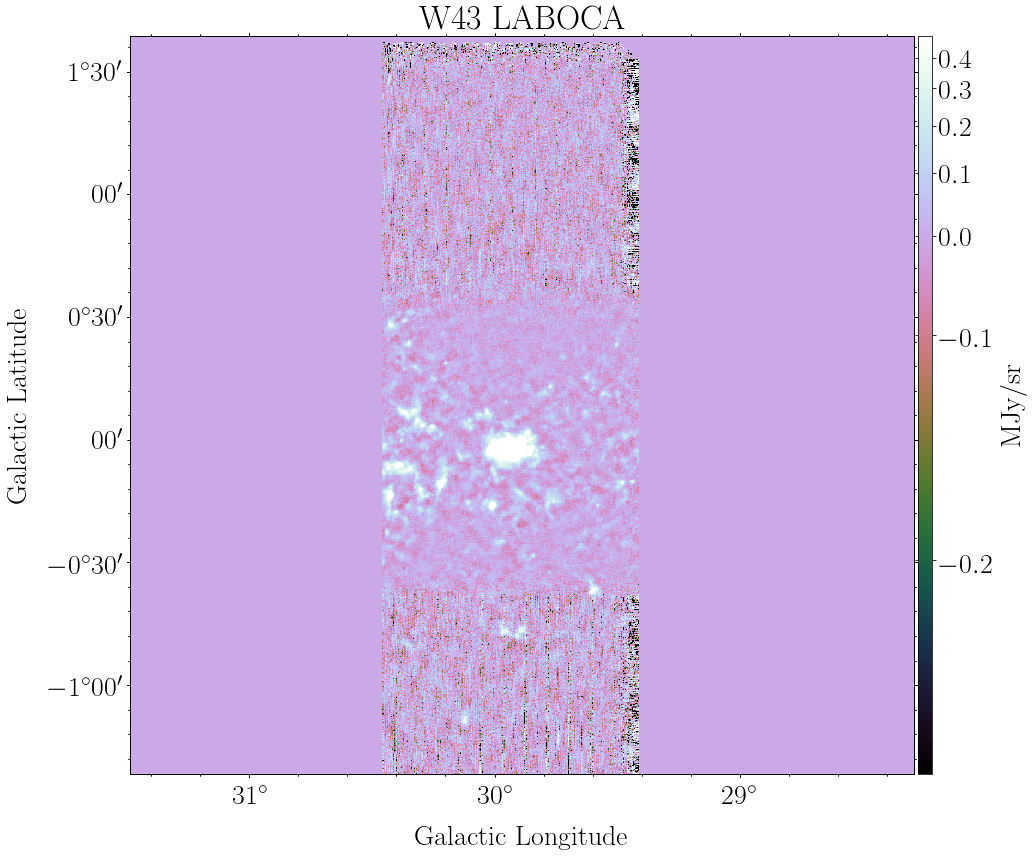

In [7]:
fig_all = plt.figure(1, figsize=(15,15))

fig = aplpy.FITSFigure(fits.PrimaryHDU(im,header=header),figure=fig_all)
fig.show_colorscale(cmap='cubehelix',stretch='arcsinh')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(header['BUNIT'])
fig.set_title("W43")

plt.tight_layout()

In [9]:
from pywavan import subfits

In [13]:
figfile2 = '/Users/robitaij/postdoc/adam_bolocam/v2.1_ds2_l030_13pca_map20_crop_reproject_cut.fits'
coords = np.array([462,332,933,875])
subfits(figfile,figfile2,coords)

Dimensions 472 544


In [14]:
#Read map
HDU = fits.open(figfile2)
im = HDU[0].data
header = HDU[0].header

#Replace Nan
im[im != im] = 0.

#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60.

INFO: Auto-setting vmin to -9.671e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.167e+00 [aplpy.core]


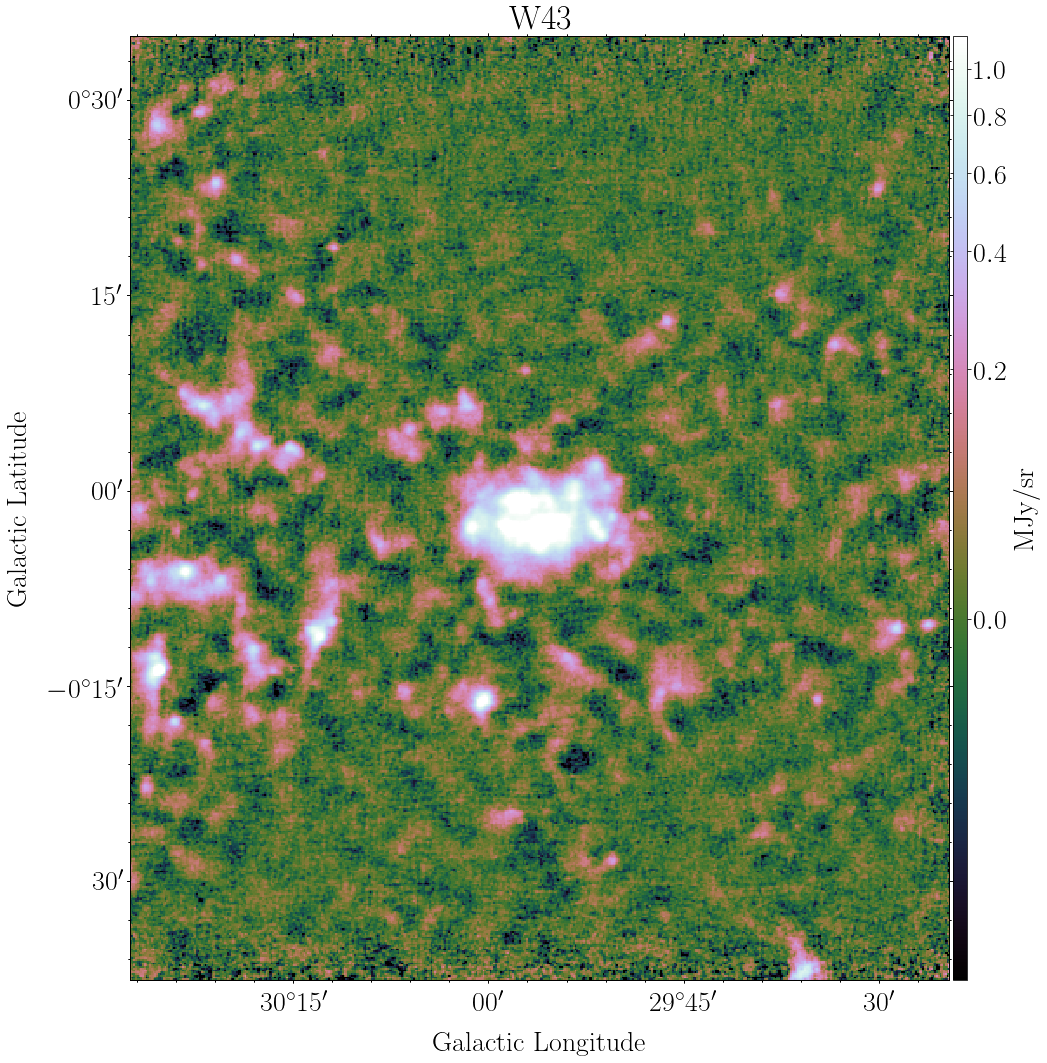

In [15]:
fig_all = plt.figure(1, figsize=(15,15))

fig = aplpy.FITSFigure(fits.PrimaryHDU(im,header=header),figure=fig_all)
fig.show_colorscale(cmap='cubehelix',stretch='arcsinh')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(header['BUNIT'])
fig.set_title("W43")

plt.tight_layout()

In [23]:
meanim = np.mean(im)
imzm = im - meanim

#Apodization
tapper = apodize(im.shape[0],im.shape[1],0.98)
imt = imzm *tapper
newdim = np.array((850,850))
imr = padding(imt,newdim[0],newdim[1])

#Fourier power spectrum
tab_k, spec_k = powspec(imr, reso=reso)

#noise = np.mean(spec_k[tab_k > 3.])

In [28]:
#Set a list of q
q=[]
q=[2.5]*M
#newdim = np.array((512,512))

#Wavelet power spectrum
wt, S11a, wav_k, S1a, q = fan_trans(im, reso=reso, q=q, qdyn=True, skewl=0.4, smooth=False, arrdim=newdim, apodize=0.98)

850 850


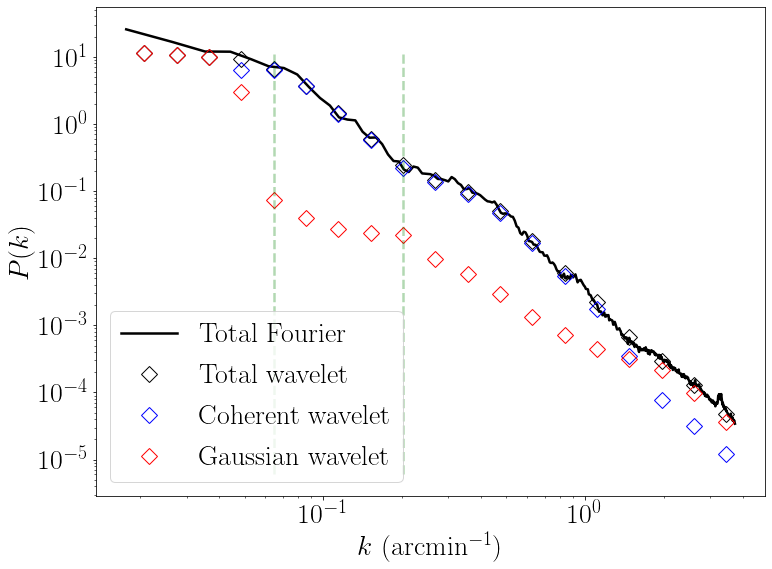

In [42]:
plt.figure(figsize(12,9))
plt.plot(tab_k[1:], spec_k[1:], color='black',label=r'Total Fourier')
plt.plot(wav_k[3:-1], S1a[0,3:-1],'D', markersize = 11, markerfacecolor='none', markeredgecolor='black', label='Total wavelet')
plt.plot(wav_k[3:-1], S1a[1,3:-1],'D', markersize = 11, markerfacecolor='none', markeredgecolor='blue', label='Coherent wavelet')
plt.plot(wav_k[3:-1], S1a[2,3:-1],'D', markersize = 11, markerfacecolor='none', markeredgecolor='red', label='Gaussian wavelet')
plt.plot([wav_k[7],wav_k[7]],[S1a[0,-1],S1a[0,3]],'--',color='green',alpha=0.3)
plt.plot([wav_k[11],wav_k[11]],[S1a[0,-1],S1a[0,3]],'--',color='green',alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ (arcmin$^{-1}$)')
plt.ylabel(r'$P(k)$')
plt.legend()

### Plot Gaussian part

INFO: Auto-setting vmin to -8.298e-02 [aplpy.core]
INFO: Auto-setting vmax to  9.489e-02 [aplpy.core]
INFO: Auto-setting vmin to -7.559e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.722e-02 [aplpy.core]


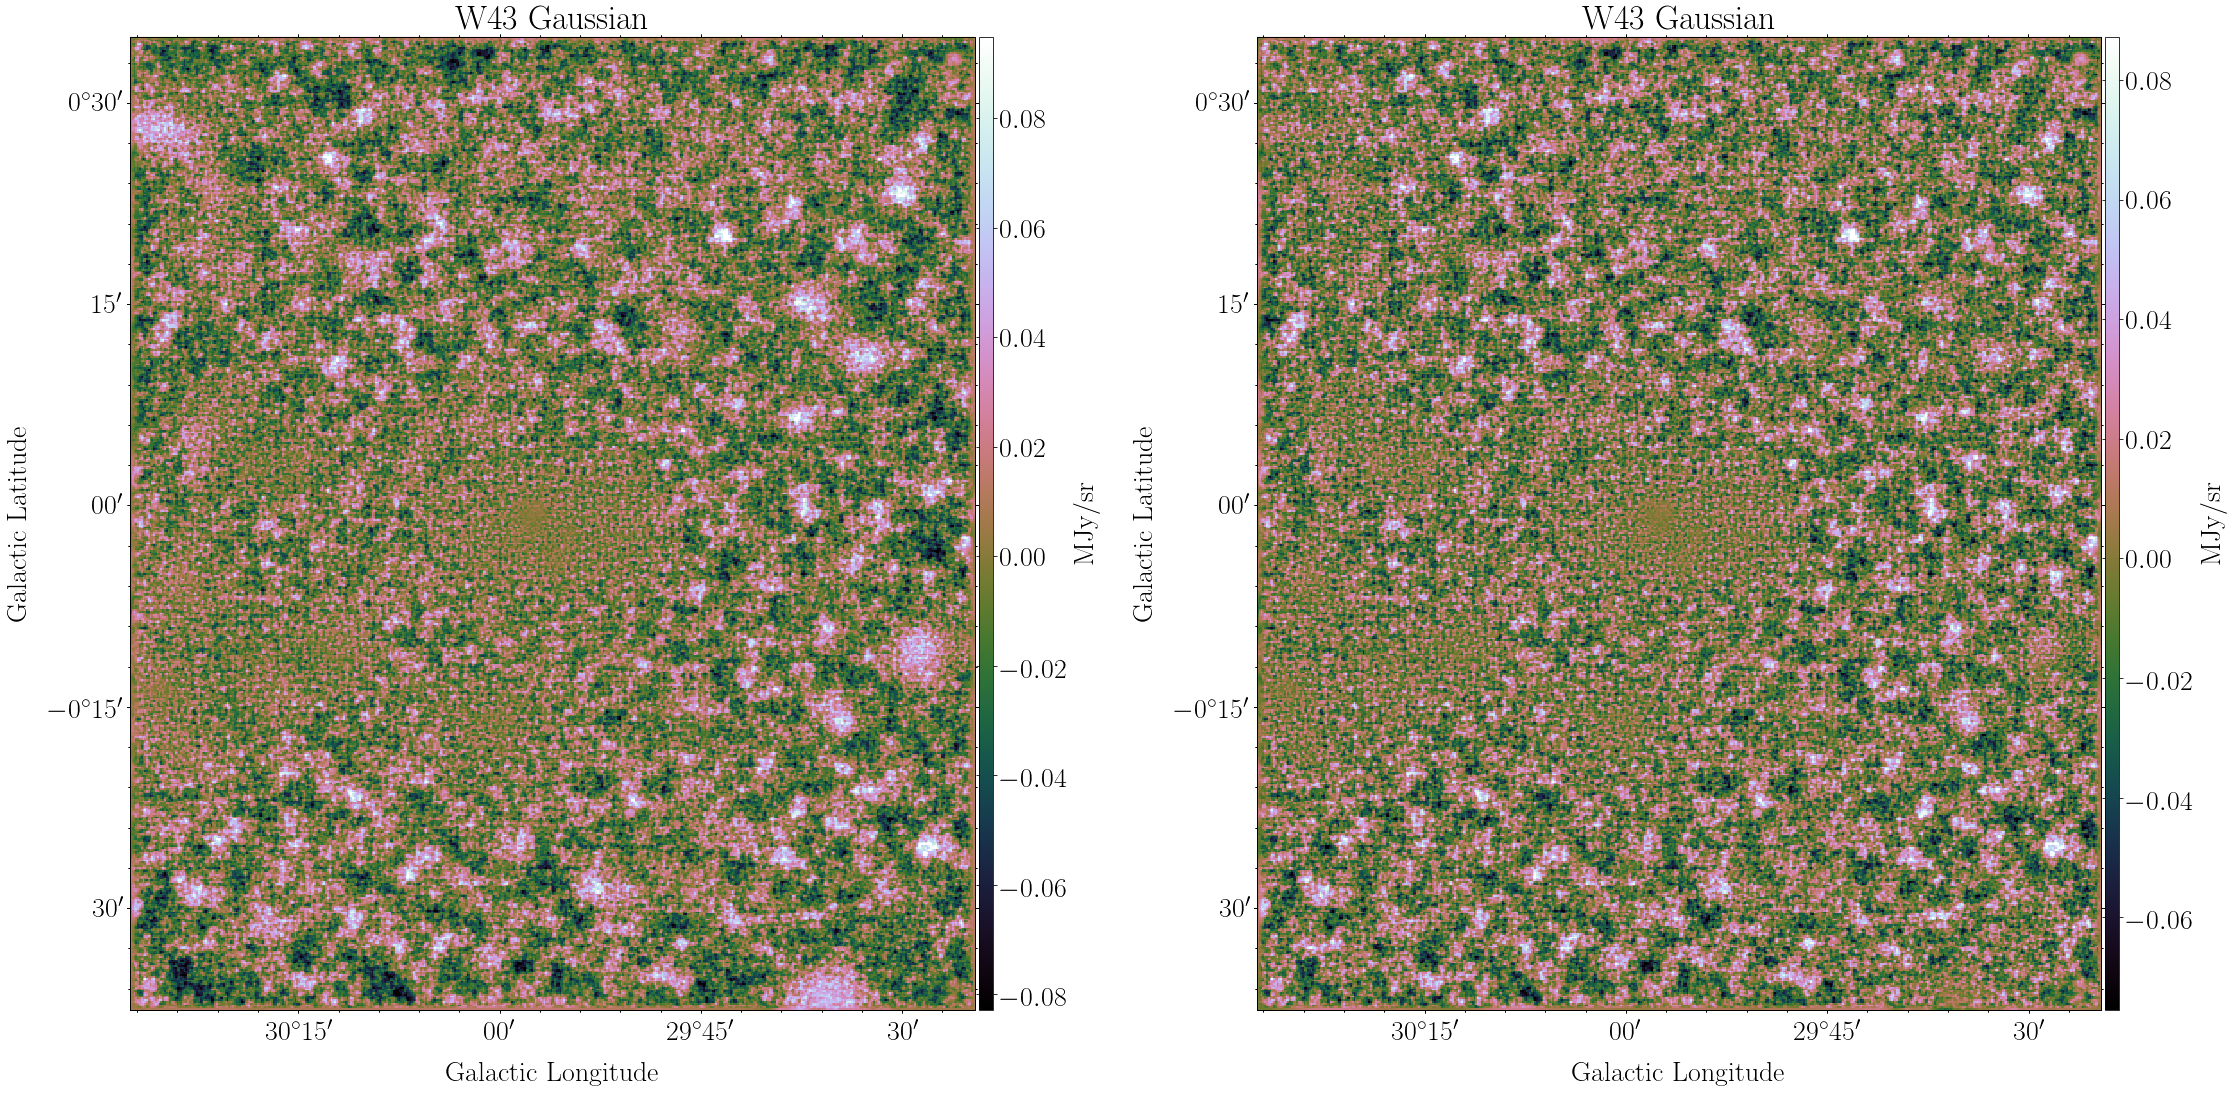

In [46]:
fig_all = plt.figure(1, figsize=(30,15))

# Including the plateau
fig = aplpy.FITSFigure(fits.PrimaryHDU(np.sum(wt[2*M+7:3*M,:,:],axis=0).real,header=header),figure=fig_all,subplot=(1,2,1))
fig.show_colorscale(cmap='cubehelix')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(header['BUNIT'])
fig.set_title("W43 Gaussian")

# Excluding the plateau
fig = aplpy.FITSFigure(fits.PrimaryHDU(np.sum(wt[2*M+11:3*M,:,:],axis=0).real,header=header),figure=fig_all,subplot=(1,2,2))
fig.show_colorscale(cmap='cubehelix')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(header['BUNIT'])
fig.set_title("W43 Gaussian")

plt.tight_layout()

plt.tight_layout()

No additional power seems to contribute to extended structures above ~5 arcmin ($k < 0.2$ arcmin$^{-1}$). Excepte ponctually, where fluctuations are associated with coherent (local non-Gaussianities)

### Plot Coherent part

INFO: Auto-setting vmin to -9.782e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.184e+00 [aplpy.core]
INFO: Auto-setting vmin to -3.694e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.966e-01 [aplpy.core]


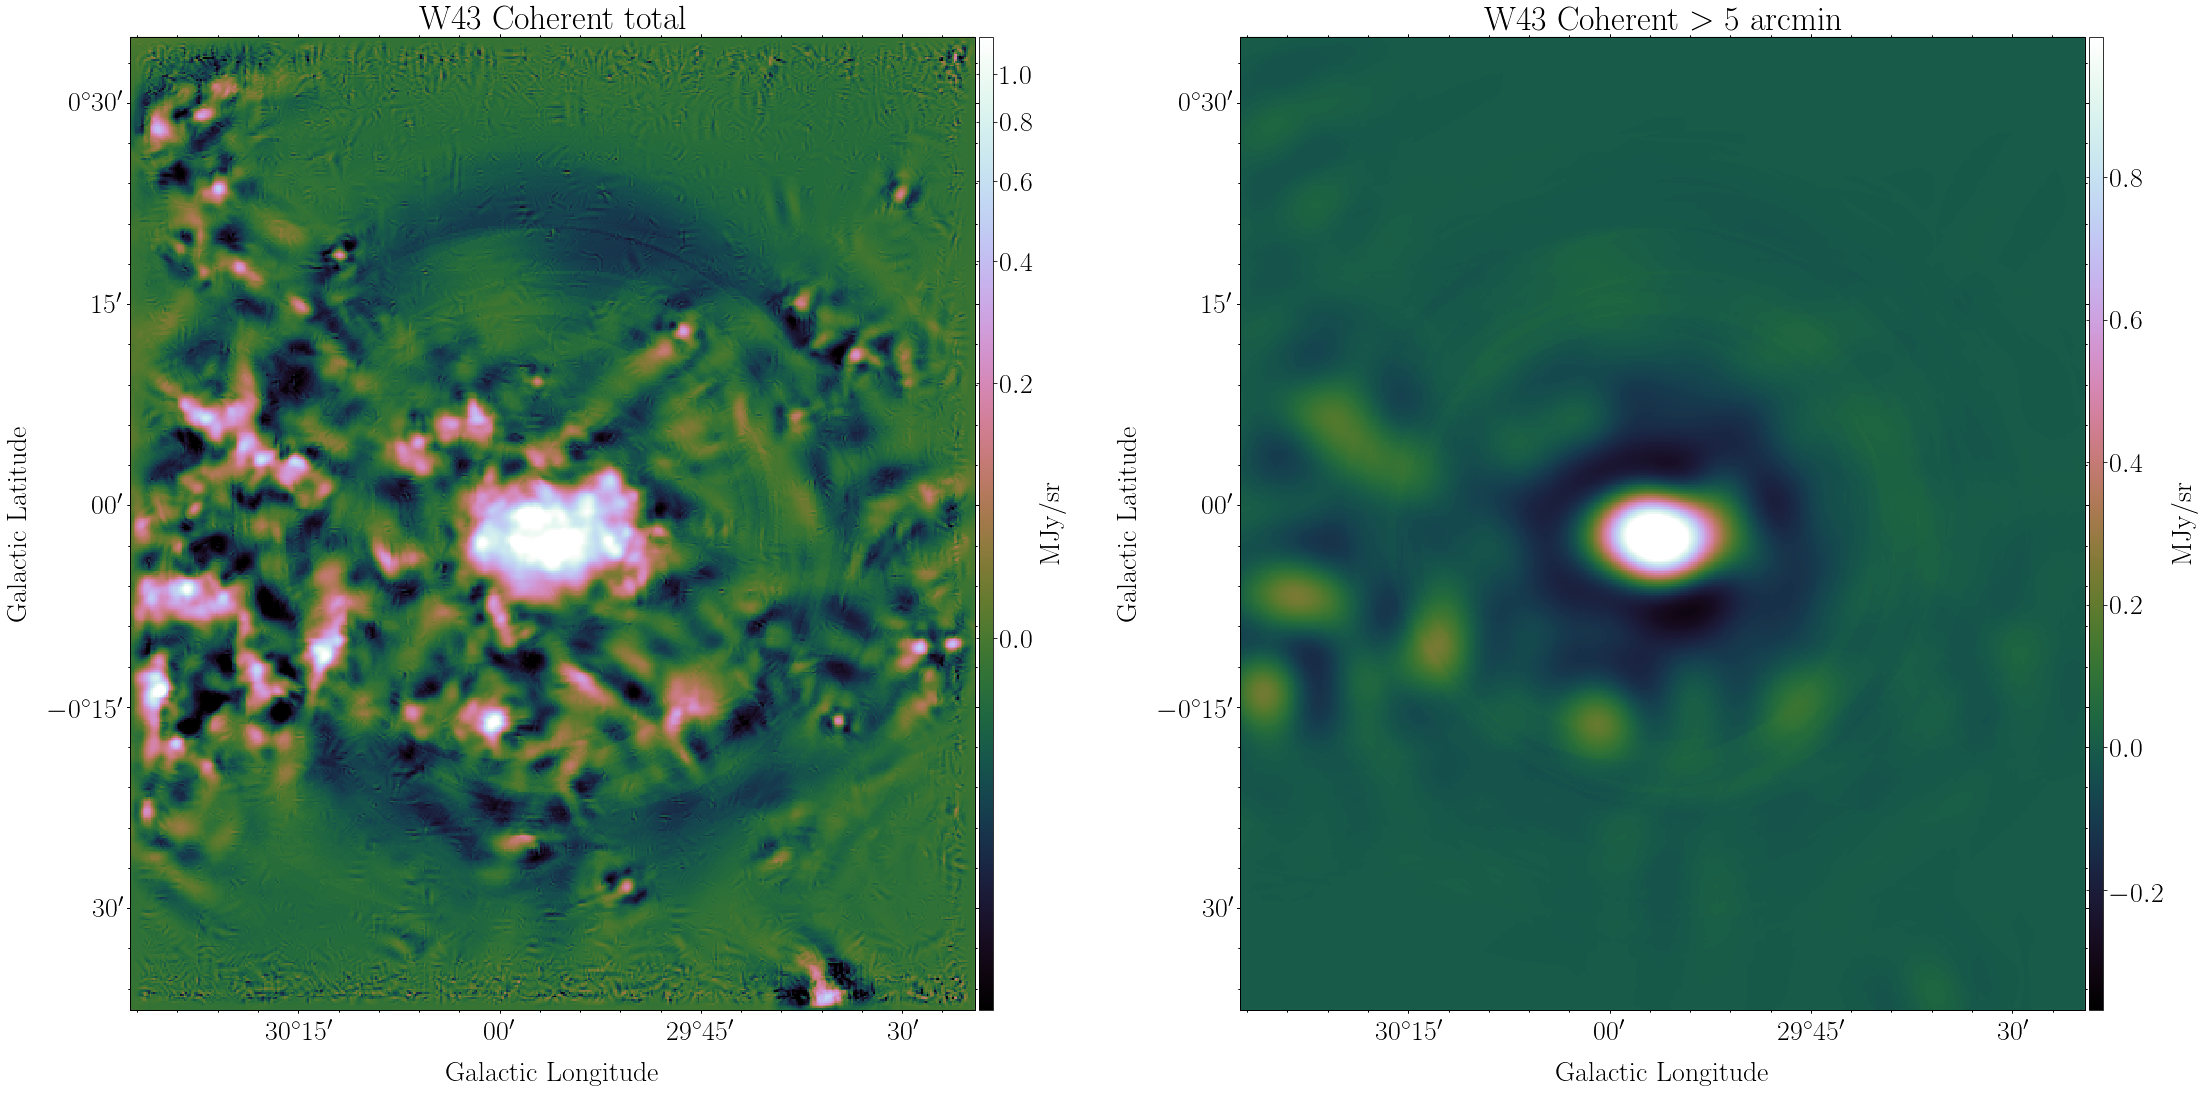

In [48]:
fig_all = plt.figure(1, figsize=(30,15))

# Whole non-Gaussian fluctuations
fig = aplpy.FITSFigure(fits.PrimaryHDU(np.sum(wt[M:2*M,:,:],axis=0).real + np.sum(wt[2*M:2*M+6,:,:],axis=0).real,header=header)
                       ,figure=fig_all,subplot=(1,2,1))
fig.show_colorscale(cmap='cubehelix',stretch='arcsinh')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(header['BUNIT'])
fig.set_title("W43 Coherent total")

# Excluding the plateau
fig = aplpy.FITSFigure(fits.PrimaryHDU(np.sum(wt[M:M+11,:,:],axis=0).real,header=header),figure=fig_all,subplot=(1,2,2))
fig.show_colorscale(cmap='cubehelix')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(header['BUNIT'])
fig.set_title("W43 Coherent $>$ 5 arcmin")

plt.tight_layout()

plt.tight_layout()

Here, I consider that coherent fluctuations above 5 arcmin are consequences of point-like sources "leaking" in term of power at larger scales.